# Absorption spectra and potential energy curves in $Br_2$

# Introduction

**Absorption spectroscopy** represent specroscopy techniques used to measure absorption of radiation by interaction with sample as function of frequency or wavelength. This dependence is *absorption spectra*. It's used in analytic chemistry to determine composition of sample. 

*Absorption spectra* is fraction of ingoing radiation that is absorbed by sample in some range of frequencies. It's determined by atomic and molecular composition of substance. The highest probability of absorption is at frequencies that correspond to energy difference between atomic/molecular energy levels, defined by quantum mechanical changes. Rotational spectra correspond to microwave part of spectra, while vibrational correspond to IR. Depending on the environment, spectra will have different width and shape. 

Using Born-Oppenheimer approximation, we can sepparate motion of electron and nucleus:

\begin{equation}
\begin{aligned}
\psi = \psi_e \psi_r \psi_v\\
E = E_e + E_r + E_v
\end{aligned}
\end{equation}

Radiation passing through matter can be reflected, absorbed or transmited. Each of these processes is described by ratio of intensities (i.e. $a = \frac{I_a}{I_0}$), and they satisfy relation:

\begin{equation}
a + r + t = 1
\end{equation}

We use transmition coefficient to define extinction:

\begin{equation}
\epsilon = - \ln t
\end{equation}

Maxima of absorption follow normal distribution around absorption maxima:

\begin{equation}
|\psi_0|^2 = \sqrt{\frac{\alpha}{\pi}} e ^ {-\alpha (r - r_e)^2}
\end{equation}

with $\alpha = \frac{\hbar \omega}{\mu}$, and depends of molecular parameters $\omega$, $\mu$.

# Analysis of extinction

In [42]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.constants import h, c, eV
from scipy.optimize import curve_fit

In [13]:
data = pd.read_csv("../data/abs_spec.csv", 
                   usecols=["e1", "e2", "e3", "e4", "e5", "l"])

In [14]:
data

,e1,e2,e3,e4,e5,l
0,0.112,0.163,0.120,0.160,0.110,350
1,0.243,0.258,0.270,0.282,0.294,360
2,0.463,0.492,0.527,0.498,0.528,370
3,0.797,0.859,0.903,0.825,0.885,380
4,1.243,1.331,1.391,1.265,1.335,390
5,1.687,1.772,1.870,1.702,1.909,400
6,2.023,2.105,2.221,2.020,2.218,410
7,2.146,2.206,2.295,2.140,2.281,420
8,2.076,2.169,2.269,2.100,2.276,430
9,1.913,2.018,2.066,1.949,1.986,440


In [18]:
keys = ["e1", "e2", "e3", "e4", "e5"]
e = np.mean([data[key].values.astype(np.float64) 
             for key in keys], axis=0)

In [19]:
e

array([0.133 , 0.2694, 0.5016, 0.8538, 1.313 , 1.788 , 2.1174, 2.2136,
       2.178 , 1.9864, 1.8238, 1.6618, 1.5502, 1.4564, 1.3598, 1.2384,
       1.091 , 0.9202, 0.75  , 0.595 , 0.4652, 0.3584, 0.277 , 0.2184,
       0.1722, 0.1462, 0.1344])

In [20]:
l = data.l.values

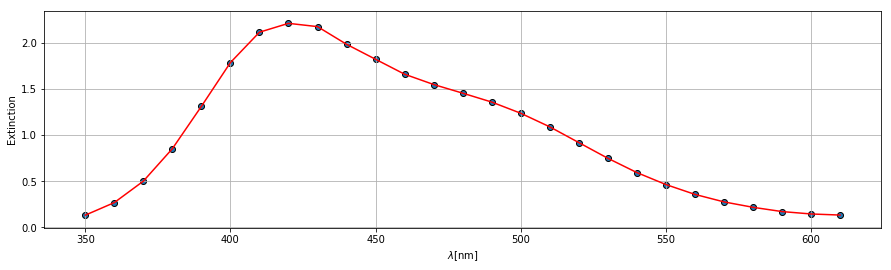

In [26]:
# visualization

fig, ax = plt.subplots()

fig.set_figwidth(15)

ax.plot(l, e, color='r')
ax.scatter(l, e, edgecolor='k')

ax.set_ylabel("Extinction")
ax.set_xlabel(r"$\lambda$[nm]")

ax.grid()

In [40]:
energy = (h * c) / (l * eV) * 10 ** 9

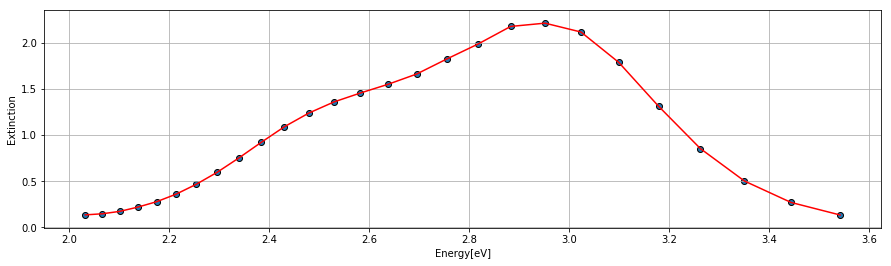

In [41]:
# visualization

fig, ax = plt.subplots()

fig.set_figwidth(15)

ax.plot(energy, e, color='r')
ax.scatter(energy, e, edgecolor='k')

ax.set_ylabel("Extinction")
ax.set_xlabel(r"Energy[eV]")

ax.grid()

In [75]:
def two_gaussians(x, *args):
    return args[0] * np.exp(-(x - args[2]) ** 2 / (args[4]) ** 2) + 
           args[1] * np.exp(-(x - args[3]) ** 2 / (args[5]) ** 2)

In [76]:
def gaussian(x, *args):
    return args[0] * np.exp(-(x - args[1]) ** 2 / (args[2])**2)

In [83]:
popt, pcov = curve_fit(two_gaussians, energy, e,
                      p0=(1.04897438, 2.10120017, 2.51285511, 2.97047033, 0.29155683, 0.3135588 ),
                      maxfev=8000,
                      bounds=([0.8, 0.8, 2.4, 2.7, 0.2, 0.2], 
                              [2, 3, 2.8, 3.1, 1.5, 1.5]))

In [84]:
popt

array([1.04897358, 2.10120085, 2.51285484, 2.97047018, 0.29155663,
       0.31355891])

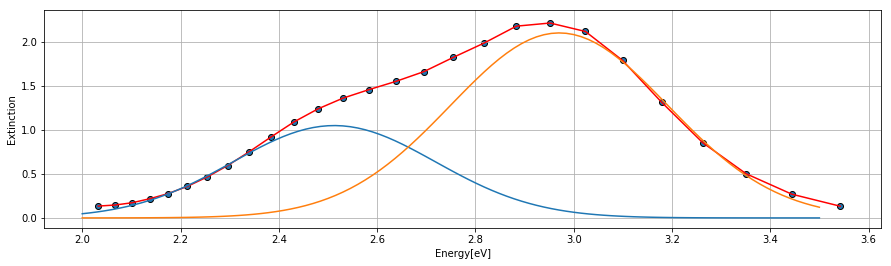

In [87]:
x = np.linspace(2, 3.5, 100)

# visualization

fig, ax = plt.subplots()

fig.set_figwidth(15)

ax.plot(energy, e, color='r')
ax.scatter(energy, e, edgecolor='k')

ax.plot(x, gaussian(x, popt[0], popt[2], popt[4]))
ax.plot(x, gaussian(x, popt[1], popt[3], popt[5]))

ax.set_ylabel("Extinction")
ax.set_xlabel(r"Energy[eV]")

ax.grid()



In [86]:
# Half width

hw_1 = popt[4]
h2_2 = popt[5]

# What next??